In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import math
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
data=pd.read_csv('HR_comma_sep.csv')

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
print(data.describe())

print ('<---------------------------------->'+ '\n')
data.info()

       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.

In [5]:
#studying categories

print (data['sales'].unique())
print (data['salary'].unique())


['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [6]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [7]:
data_left=data[data.left==1]
data_unleft=data[data.left==0]
data_left.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


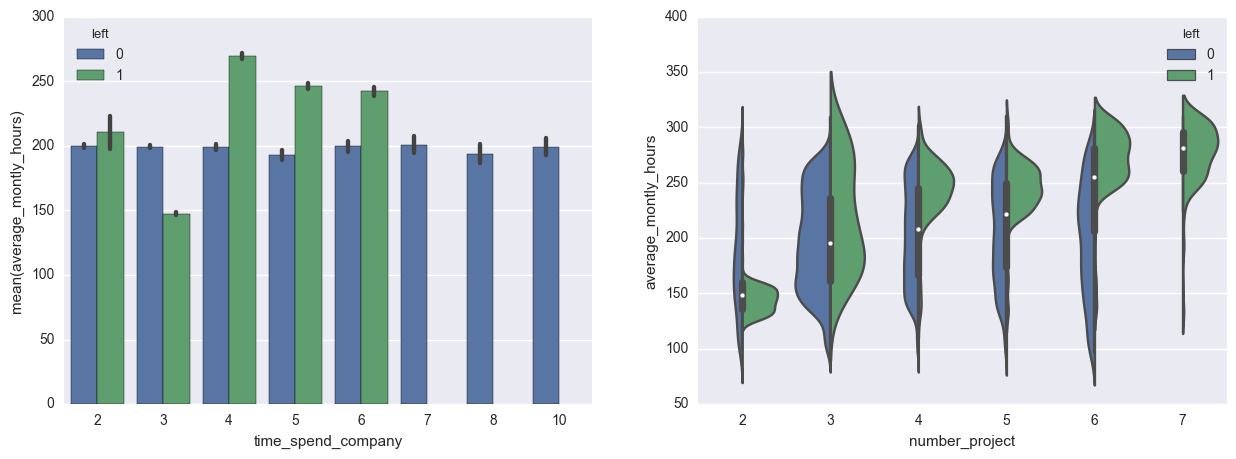

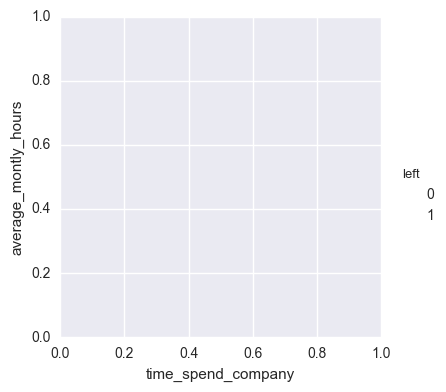

In [8]:
fig, (axis1,axis2) = plt.subplots(1,2, figsize=(15,5))
sb.factorplot(x='time_spend_company', y='average_montly_hours', hue='left', data=data, kind='bar', ax=axis1)
sb.violinplot(x='number_project', y='average_montly_hours', hue='left', data=data, split=True, ax=axis2)

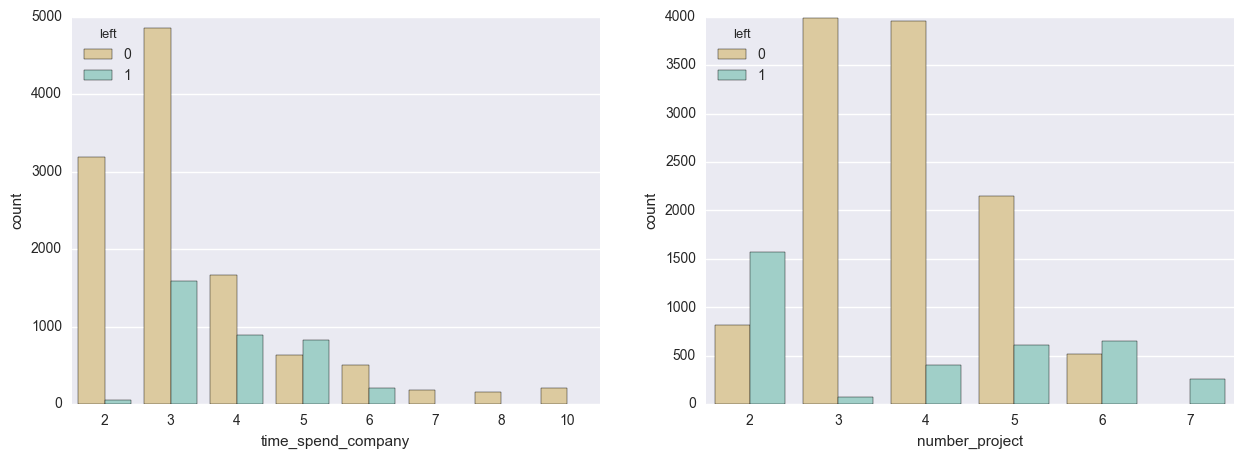

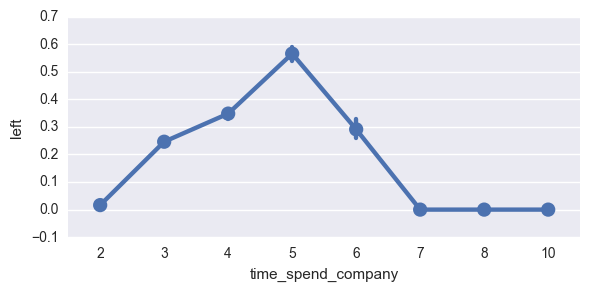

In [9]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sb.countplot(x='time_spend_company', hue='left',data=data, palette="BrBG")
plt.subplot(1,2,2)
sb.countplot(x='number_project', hue='left',data=data, palette='BrBG')

sb.factorplot(x='time_spend_company', y='left', data=data, size=3, aspect=2)

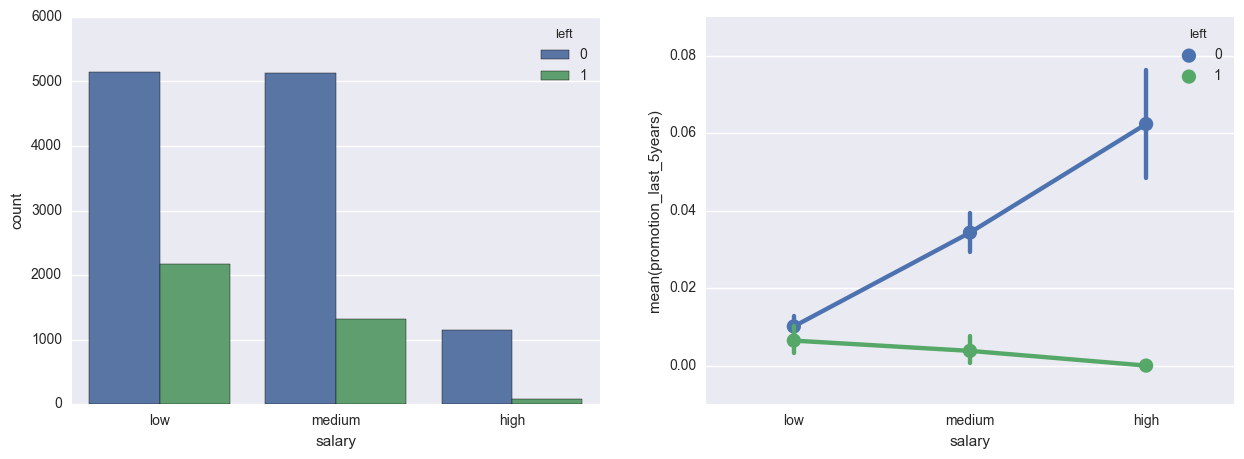

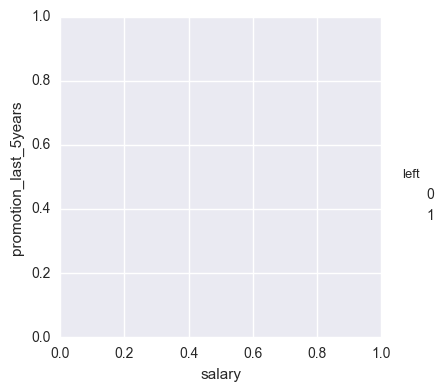

In [10]:
f, (axis1,axis2)=plt.subplots(1,2, figsize=(15,5))
sb.countplot(x='salary', hue='left', data=data, ax=axis1)
#plt.subplot(1,2,2)
sb.factorplot(x='salary', y='promotion_last_5years', hue='left', data=data, ax=axis2, )

In [11]:
#Converting the continous variables into categorial for better estimation in graphs
data['satisfaction_level_cat']=0
 
def tocategory(level):
    temp=math.ceil(level*10)
    level=temp/10
    return level

data['satisfaction_level_cat']=data[['satisfaction_level']].apply(tocategory, axis=1)
data['satisfaction_level_cat'].head()

data['last_evaluation_cat']=data[['last_evaluation']].apply(tocategory, axis=1)
data['last_evaluation_cat'].head()

0    0.6
1    0.9
2    0.9
3    0.9
4    0.6
Name: last_evaluation_cat, dtype: float64

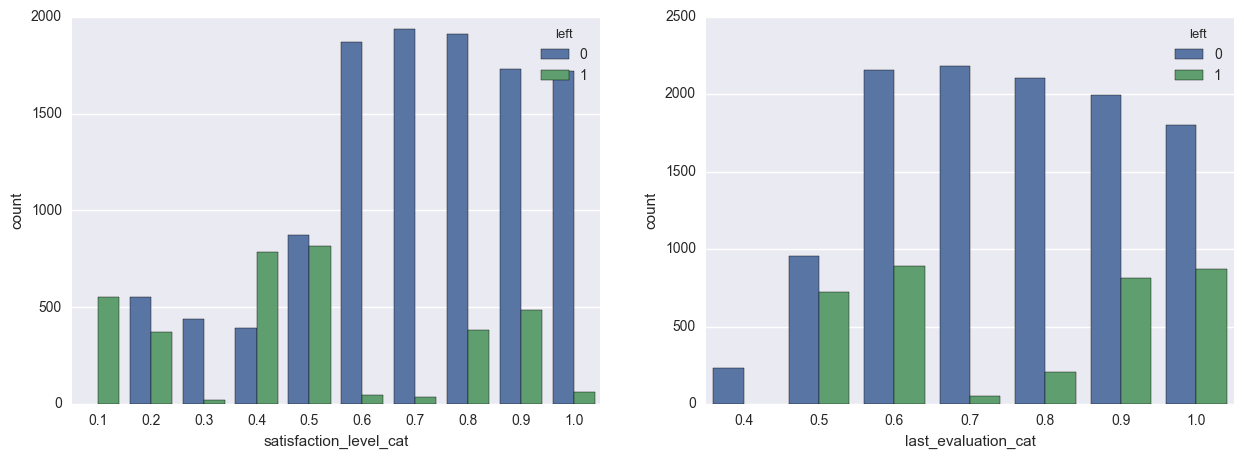

In [12]:
f, (axis1,axis2)=plt.subplots(1,2, figsize=(15,5))
sb.countplot(x="satisfaction_level_cat", hue="left", data=data,ax= axis1);
sb.countplot(x="last_evaluation_cat", hue="left", data=data,ax= axis2);


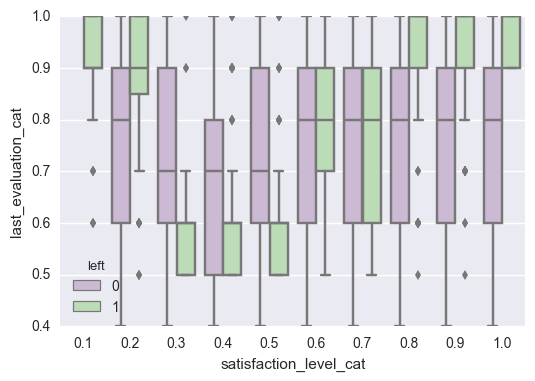

In [13]:
plt.subplot(111)
sb.boxplot(x="satisfaction_level_cat", y="last_evaluation_cat", hue="left", data=data, palette="PRGn")


In [41]:
#Splitting in training and testing datasets
model_data=data.drop(labels=['satisfaction_level_cat', 'last_evaluation_cat', 'salary', 'sales'], axis=1)
train = model_data.sample(frac=0.8, random_state=1)
print (train.shape)
test = model_data.loc[~model_data.index.isin(train.index)]

'''
#convert string variables into int
def harmonize(data):
    data.loc[data['salary']=='low']=0
    data.loc[data['salary']=='medium']=1
    data.loc[data['salary']=='low']=2
    
    data.loc[data['sales']== s=findname()'''

(11999, 8)


"\n#convert string variables into int\ndef harmonize(data):\n    data.loc[data['salary']=='low']=0\n    data.loc[data['salary']=='medium']=1\n    data.loc[data['salary']=='low']=2\n    \n    data.loc[data['sales']== s=findname()"

In [37]:
# Import the random forest model.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

print (train.columns)

predictors=['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']

model = RandomForestClassifier(n_estimators=100, min_samples_leaf=10, random_state=1)
model.fit(train[predictors], train["left"])

predictions = model.predict(test[predictors])
accuracy_score(predictions, test['left'])

Index([u'satisfaction_level', u'last_evaluation', u'number_project',
       u'average_montly_hours', u'time_spend_company', u'Work_accident',
       u'left', u'promotion_last_5years'],
      dtype='object')


0.97733333333333339